TKO_8965 Deep Learning in Human Language Technology 2020

Text classification project

Hanna Kitti hrkitt@utu.fi <br>
Jenna Peltomäki jjpelt@utu.fi <br>
Timo Jokela tejjok@utu.fi <br>
Dang Trinh Ha dangtrinh.ha@utu.fi <br>

April 2020

---

**Deadline May 12th 2020**
- Return the project by email to sampo.pyysalo@utu.fi.

## Introduction

Write an introductory chapter here
- What is the purpose of this task?
- What kind of data were used? Where did it originate?
- Which methods did you use?
- ...


## Data preparation

Perform preparations for the data **(author)**
- blah

In [1]:
# -=* Download Data *=-

!wget http://dl.turkunlp.org/TKO_8965-projects/classification/fincore-dev.tsv
!wget http://dl.turkunlp.org/TKO_8965-projects/classification/fincore-test.tsv
!wget http://dl.turkunlp.org/TKO_8965-projects/classification/fincore-train.tsv

--2020-04-13 10:27:14--  http://dl.turkunlp.org/TKO_8965-projects/classification/fincore-dev.tsv
Resolving dl.turkunlp.org (dl.turkunlp.org)... 195.148.30.23
Connecting to dl.turkunlp.org (dl.turkunlp.org)|195.148.30.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4035578 (3.8M) [application/octet-stream]
Saving to: ‘fincore-dev.tsv’

fincore-dev.tsv     100%[===================>]   3.85M  3.53MB/s    in 1.1s    

2020-04-13 10:27:16 (3.53 MB/s) - ‘fincore-dev.tsv’ saved [4035578/4035578]

--2020-04-13 10:27:17--  http://dl.turkunlp.org/TKO_8965-projects/classification/fincore-test.tsv
Resolving dl.turkunlp.org (dl.turkunlp.org)... 195.148.30.23
Connecting to dl.turkunlp.org (dl.turkunlp.org)|195.148.30.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8512687 (8.1M) [application/octet-stream]
Saving to: ‘fincore-test.tsv’

fincore-test.tsv    100%[===================>]   8.12M  6.59MB/s    in 1.2s    

2020-04-13 10:27:18 (6.59 MB/

In [2]:
# -=* Import Data as Dataframe *=-

import pandas as pd 
data_train_df = pd.read_csv("fincore-train.tsv", sep='\t', header=None, names=['class', 'document'])
#data_test_df = pd.read_csv("fincore-test.tsv", sep='\t', header=None, names=['class', 'document'])

print(data_train_df.shape)
print("Classes:", data_train_df.iloc[0:4,0])
print("Documents:", data_train_df.iloc[0:4,1])


(5295, 2)
Classes: 0    PB NA 
1    MT OS 
2    MT OS 
3    DF ID 
Name: class, dtype: object
Documents: 0     Tämähän menee ihan hurjaksi muotihurjasteluks...
1     Kirjoittaja Arkisto Tehdä rahaa kaupankäynnin...
2     7 Sultans on osoittautunut yhdeksi suosituimm...
3     Re : [ 0-lista ] Re : jakelijoita DIUCeille 1...
Name: document, dtype: object


In [3]:
# -=* Separate Data into Documents and Classes *=-

docs = data_train_df["document"].tolist()
classes = data_train_df["class"].tolist()

print(docs[0])
print(classes)

 Tämähän menee ihan hurjaksi muotihurjasteluksi . Jo toistamiseen tälle syksylle postauksen aiheena vaatetus . Mutta tämä liittyy tavallaan matkailuun . Ja katsokaa nyt näitä , mitkä maailman ihanimmat villahousut ! Aagh , haluan pukea heti jalkaan nuo Kaksitvån hurmaavat raitapökät ja ottaa suunnan kohti pohjoista . Pohjoista koska siellä on edelleen ruska ( noh , ainakin sillain punertavan rusehtava maasto ) ja koska Salla onnistui markkinoimaan itseään minulle niin vastaansanomattomasti . Ensi viikko 7.-13.10 . on nimittäin Sallassa ( jälleen ) Ei tapahdu mitään -viikko . Ensi viikolla ( kaan ) Sallassa ei siis tapahdu mitään , joten sinne kannattaa ilman muuta matkustaa . " Tapahtuman " tunnelmaan voi virittäytyä Salla-sivuston vinkeillä . Lienee ymmärrettävää että kaikki tämä villahousufiilistely ja matkakuume aiheuttaa meikäläisessä innostunutta huudahtelua ( pari huutomerkkiä tähän väliin ! ! ) , sillä tulkitsen ne merkkinä : saatan ehkä sittenkin selvitä tulevasta talvesta ilma

In [4]:
# -=* Turns class labels into integers *=-

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() #
class_numbers = label_encoder.fit_transform(classes)

print("class_numbers shape=", class_numbers.shape)
print("class labels", label_encoder.classes_) 
print("class numbers", class_numbers) 

class_numbers shape= (5295,)
class labels ['AV OP ' 'AV OP DS IG ' 'CB NA ' 'CB NA DS IG ' 'CB NA HI  '
 'CB NA IP IG ' 'CB NA RV OP ' 'CB NA SR NA ' 'CM IN ' 'DF ID '
 'DF ID FC NA ' 'DF ID HI  ' 'DF ID RE HI ' 'DP IN ' 'DP IN CB NA '
 'DP IN DS IG ' 'DP IN EN IN ' 'DP IN FC NA ' 'DP IN IP IG ' 'DP IN NA  '
 'DS IG ' 'DS IG HI  ' 'DS IG IN  ' 'DS IG OB OP ' 'DS IG RV OP ' 'DT IN '
 'DT IN AV OP ' 'DT IN FC NA ' 'DT IN HI  ' 'DT IN NE NA ' 'DT IN RV OP '
 'EB IG ' 'EN IN ' 'EN IN FC NA ' 'EN IN HI  ' 'EN IN IP IG ' 'FA IN '
 'FC NA ' 'FC NA ID  ' 'FS SP ' 'HA NA ' 'HA NA DP IN ' 'HA NA DS IG '
 'HA NA PB NA ' 'HI  ' 'HI  DS IG ' 'HI  DT IN ' 'HI  EN IN ' 'HI  LT IN '
 'HI  NE NA ' 'IB IN ' 'IB IN AV OP ' 'IB IN CB NA ' 'ID  ' 'ID  FC NA '
 'IN  ' 'IN  HI  ' 'IP IG ' 'IT SP ' 'JD IN ' 'LT IN ' 'MT OS '
 'MT OS DS IG ' 'MT OS DT IN ' 'MT OS EN IN ' 'MT OS RV OP ' 'NA  '
 'NE NA ' 'NE NA DS IG ' 'NE NA HI  ' 'NE NA IP IG ' 'NE NA RV OP '
 'OA NA ' 'OA NA DP IN ' 'OA NA DS IG ' 'OA NA HI  

In [0]:
# -=* Helper funtions *=-

import matplotlib.pyplot as plt
def plot_history(history):
    train_metric = 'acc' if 'acc' in history.history else 'accuracy'
    val_metric = 'val_acc' if 'val_acc' in history.history else 'val_accuracy'
    print("History:", history.history[val_metric])
    print("Max accuracy:", max(history.history[val_metric]))
    y_min = min(history.history[train_metric] + history.history[val_metric])
    y_max = max(history.history[train_metric] + history.history[val_metric])
    plt.ylim(max(y_min-0.1, 0.0), min(y_max+0.1, 1.0))
    plt.plot(history.history[val_metric],'b', label="Validation accuracy")
    plt.plot(history.history[train_metric], 'bo',label="Training accuracy")
    plt.legend()
    plt.show()

def plot_history_loss(history):
    print("History:", history.history['val_loss'])
    print("Min loss:", min(history.history['val_loss']))
    y_min = min(history.history['loss'] + history.history['val_loss'])
    y_max = max(history.history['loss'] + history.history['val_loss'])
    plt.ylim(max(y_min-0.1, 0.0), min(y_max+0.1, 1.0))
    plt.plot(history.history['val_loss'],'b', label="Validation loss")
    plt.plot(history.history['loss'], 'bo',label="Training loss")
    plt.legend()
    plt.show()

# BoW
from tensorflow.python.keras.layers import Dense, Input
from tensorflow.python.keras.models import Model

def build_bow_model(feature_matrix, label_encoder, nodes=200):
    doc_count, feature_count = feature_matrix.shape
    class_count=len(label_encoder.classes_)
    inp=Input(shape=(feature_count,))
    hidden=Dense(nodes,activation="tanh")(inp)
    output=Dense(class_count,activation="softmax")(hidden)
    return Model(inputs=[inp], outputs=[output])



 ### Milestone 1.1: Bag-of-words classifier (multi-class)


Train a bag-of-words classifier to predict the register categories. In this milestone, the setting is multi-class, so the register label combinations form the classes, e.g. NA_NE and NA_NE_OP_OB. Evaluate your model and report your results with different hyperparameters.


In [6]:
# -=* Vectorize Documents into Vectors (a feature matrix) *=-

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=100000, lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(docs)
#print(f'Vocabulary: {list(tokenizer.word_index.keys())}')

feature_matrix = tokenizer.texts_to_matrix(docs, mode='count')

print("Shape=",feature_matrix.shape)
print(type(feature_matrix))
print(feature_matrix[0,0:5])


Using TensorFlow backend.


Shape= (5295, 100000)
<class 'numpy.ndarray'>
[0. 5. 2. 2. 1.]


In [7]:
from pprint import pprint    # pretty-printer

def truncate_dict(d, count=10):
    # Returns at most count items from the given dictionary.  
    return dict(i for i, _ in zip(d.items(), range(count)))

# Check if 0 is in the index, and print examples of the mapping
print(tokenizer.word_index.get(0))
pprint(truncate_dict(tokenizer.word_index))

None
{'ei': 3,
 'että': 4,
 'ja': 1,
 'kun': 9,
 'mutta': 8,
 'oli': 7,
 'on': 2,
 'ovat': 10,
 'se': 6,
 'tai': 5}


In [8]:
model = build_bow_model(feature_matrix, label_encoder, nodes=200)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
print(model.summary())
hist = model.fit(feature_matrix, class_numbers, batch_size=100, verbose=1, epochs=15, validation_split=0.1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100000)]          0         
_________________________________________________________________
dense (Dense)                (None, 200)               20000200  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
Total params: 20,020,300
Trainable params: 20,020,300
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
48/48 [==============================] - 2s 38ms/step - loss: 2.4628 - accuracy: 0.4789 - val_loss: 1.8270 - val_accuracy: 0.5925
Epoch 2/15
48/48 [==============================] - 2s 32ms/step - loss: 0.5703 - accuracy: 0.9215 - val_loss: 1.7253 - val_accuracy: 0.6057
Epoch 3/15
48/48 [==============================] - 2s 32ms/step - loss: 0.1846 - accuracy: 

History: [0.5924528241157532, 0.6056603789329529, 0.6056603789329529, 0.6113207340240479, 0.6018868088722229, 0.6113207340240479, 0.6094339489936829, 0.6018868088722229, 0.5943396091461182, 0.6018868088722229, 0.6000000238418579, 0.6000000238418579, 0.5962263941764832, 0.5924528241157532, 0.5905660390853882]
Max accuracy: 0.6113207340240479


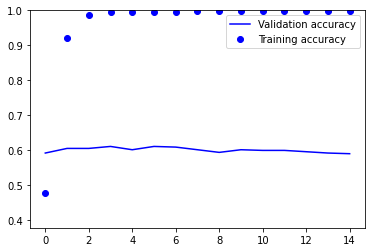

History: [1.8270245790481567, 1.7253457307815552, 1.7410582304000854, 1.7298002243041992, 1.7636375427246094, 1.7636677026748657, 1.7756118774414062, 1.7886849641799927, 1.8104034662246704, 1.8234668970108032, 1.829935908317566, 1.8404699563980103, 1.8507674932479858, 1.8647136688232422, 1.876289963722229]
Max loss: 1.876289963722229


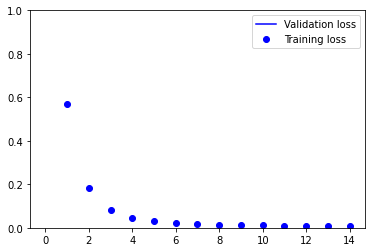

In [9]:
plot_history(hist)
plot_history_loss(hist)

BoW scoring with Term Frequency - Inverse Document Frequency

In [10]:
feature_matrix = tokenizer.texts_to_matrix(docs, mode='tfidf')
print("Shape=",feature_matrix.shape)
print(type(feature_matrix))
print(feature_matrix[0,0:5])

Shape= (5295, 100000)
<class 'numpy.ndarray'>
[0.         1.83295904 1.21727852 1.49631475 0.89169053]


In [11]:
model = build_bow_model(feature_matrix, label_encoder, nodes=200)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
print(model.summary())
# Fit
hist = model.fit(feature_matrix, class_numbers, batch_size=100, verbose=1, epochs=15, validation_split=0.1)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100000)]          0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20000200  
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
Total params: 20,020,300
Trainable params: 20,020,300
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
48/48 [==============================] - 2s 46ms/step - loss: 2.2272 - accuracy: 0.4974 - val_loss: 1.7166 - val_accuracy: 0.5962
Epoch 2/15
48/48 [==============================] - 2s 42ms/step - loss: 0.0986 - accuracy: 0.9843 - val_loss: 1.7327 - val_accuracy: 0.6000
Epoch 3/15
48/48 [==============================] - 2s 42ms/step - loss: 0.0308 - accuracy

History: [0.5962263941764832, 0.6000000238418579, 0.6037735939025879, 0.5981131792068481, 0.5943396091461182, 0.5981131792068481, 0.5962263941764832, 0.5981131792068481, 0.5924528241157532, 0.5962263941764832, 0.5962263941764832, 0.5943396091461182, 0.5924528241157532, 0.5943396091461182, 0.5905660390853882]
Max accuracy: 0.6037735939025879


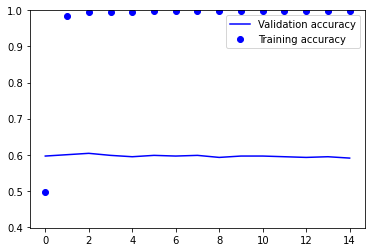

History: [1.7165838479995728, 1.7326956987380981, 1.7311121225357056, 1.748432993888855, 1.7677358388900757, 1.7824783325195312, 1.7982758283615112, 1.8147153854370117, 1.829222559928894, 1.841086983680725, 1.8517869710922241, 1.860405445098877, 1.871895432472229, 1.8790264129638672, 1.8826290369033813]
Max loss: 1.8826290369033813


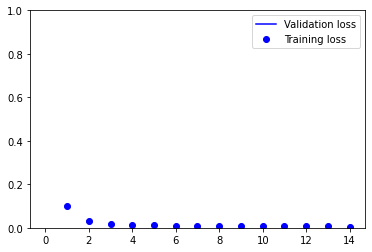

In [12]:
plot_history(hist)
plot_history_loss(hist)

BoW binary scoring of the presence of absence of words

In [13]:
feature_matrix = tokenizer.texts_to_matrix(docs, mode='binary')
print("Shape=",feature_matrix.shape)
print(type(feature_matrix))
print(feature_matrix[0,0:5])

Shape= (5295, 100000)
<class 'numpy.ndarray'>
[0. 1. 1. 1. 1.]


In [14]:
model = build_bow_model(feature_matrix, label_encoder, nodes=200)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
print(model.summary())
# Fit
hist = model.fit(feature_matrix, class_numbers, batch_size=100, verbose=1, epochs=15, validation_split=0.1)


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100000)]          0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               20000200  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
Total params: 20,020,300
Trainable params: 20,020,300
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
48/48 [==============================] - 2s 37ms/step - loss: 2.5221 - accuracy: 0.4739 - val_loss: 1.8846 - val_accuracy: 0.5849
Epoch 2/15
48/48 [==============================] - 2s 35ms/step - loss: 0.5966 - accuracy: 0.9125 - val_loss: 1.7843 - val_accuracy: 0.6057
Epoch 3/15
48/48 [==============================] - 2s 36ms/step - loss: 0.1781 - accuracy

History: [0.5849056839942932, 0.6056603789329529, 0.5905660390853882, 0.6000000238418579, 0.5962263941764832, 0.5981131792068481, 0.5886792540550232, 0.5905660390853882, 0.5849056839942932, 0.5886792540550232, 0.5886792540550232, 0.5886792540550232, 0.5886792540550232, 0.5849056839942932, 0.5849056839942932]
Max accuracy: 0.6056603789329529


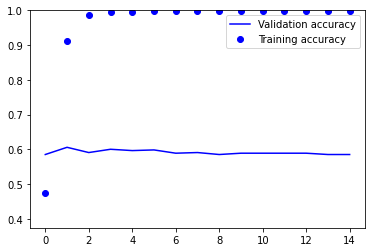

History: [1.8846150636672974, 1.7843408584594727, 1.7923107147216797, 1.8045120239257812, 1.8219510316848755, 1.8391742706298828, 1.8532768487930298, 1.8635715246200562, 1.8778740167617798, 1.8896656036376953, 1.8997992277145386, 1.910180926322937, 1.9212394952774048, 1.9304014444351196, 1.9336048364639282]
Max loss: 1.9336048364639282


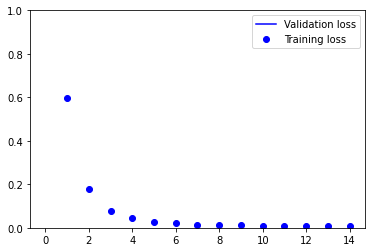

In [15]:
plot_history(hist)
plot_history_loss(hist)

 ### Milestone 1.2: Recurrent Neural Network Classifier (multi-class)


In [16]:
import numpy as np

sequences = tokenizer.texts_to_sequences(docs)

# Print an example text, its corresponding sequence, and the tokens it represents
print('Text:', docs[0][:100])
print('Sequence:', sequences[0])
print('Mapped back:', [tokenizer.index_word[i] for i in sequences[0][:10]])

lengths = [len(s) for s in sequences]
print('Lengths:', lengths[:10], 'min:', min(lengths), 'max:', max(lengths), 'mean:', np.mean(lengths))


Text:  Tämähän menee ihan hurjaksi muotihurjasteluksi . Jo toistamiseen tälle syksylle postauksen aiheena 
Sequence: [7925, 422, 79, 61946, 32, 11697, 1228, 61947, 9460, 6369, 24166, 8, 24, 806, 2676, 76570, 1, 7926, 23, 307, 1109, 203, 76571, 887, 15340, 260, 10474, 883, 1, 176, 8460, 424, 27734, 27734, 46, 181, 2, 236, 4020, 164, 52482, 18352, 1, 46, 9461, 2561, 45347, 764, 237, 13, 549, 1401, 111, 214, 76, 2, 794, 531, 3, 4282, 65, 1401, 549, 992, 20231, 3, 68, 4282, 65, 98, 476, 356, 119, 202, 4410, 1907, 25847, 19, 9461, 826, 40282, 1318, 7057, 4, 28, 24, 1, 76572, 703, 76573, 341, 159, 1858, 55, 61948, 34, 15341, 7764, 127, 3964, 4283, 4944, 36096, 119, 127, 3758, 5861, 1, 32703]
Mapped back: ['tämähän', 'menee', 'ihan', 'hurjaksi', 'jo', 'toistamiseen', 'tälle', 'syksylle', 'postauksen', 'aiheena']
Lengths: [109, 537, 605, 108, 149, 785, 399, 399, 268, 143] min: 0 max: 81038 mean: 584.7454202077431


In [17]:
# https://github.com/TurkuNLP/Deep_Learning_in_LangTech_course/blob/master/rnn_text_classification.ipynb

from tensorflow.keras.preprocessing.sequence import pad_sequences

# The padding and truncating parameters default to 'pre', i.e. aligning
# the end of the input with the end of the padded sequence. With 'post',
# we're here aligning the beginning instead.

post_padded_X = pad_sequences(
    sequences,
    maxlen=250,
    padding='post',
    truncating='post',
    value=0
)

# Compare those
print('type(sequences):', type(sequences))
print('type(padded):', type(post_padded_X))
print('padded.shape:', post_padded_X.shape)

type(sequences): <class 'list'>
type(padded): <class 'numpy.ndarray'>
padded.shape: (5295, 250)


In [20]:
# https://github.com/TurkuNLP/Deep_Learning_in_LangTech_course/blob/master/rnn_text_classification.ipynb

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, LSTM, Dense


def build_rnn_model(RNN_class, sequence_length, vocab_size, num_classes,
                    embedding_dim=250, rnn_units=50, drop=0.2, rdrop=0.2):
    input_ = Input(shape=(sequence_length,))
    embedding = Embedding(vocab_size, embedding_dim)(input_)
    # return_sequences=False is the default
    rnn = RNN_class(rnn_units, return_sequences=False)(embedding)
    #rnn = RNN_class(rnn_units, dropout=drop, recurrent_dropout=rdrop, return_sequences=False)(embedding)
    output = Dense(num_classes, activation='softmax')(rnn)
    return Model(inputs=[input_], outputs=[output])


sequence_length = post_padded_X.shape[1]
vocab_size = tokenizer.num_words
num_classes = len(label_encoder.classes_)

pre_padded_X = pad_sequences(
    sequences,
    maxlen=250,
    padding='pre',
    truncating='pre',
    value=0
)

print('Pre-padded:')
print(pre_padded_X[0])

epochs = 13
batch_size = 100
lstm_model = build_rnn_model(LSTM, sequence_length, vocab_size, num_classes)
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_history = lstm_model.fit(pre_padded_X, class_numbers, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Pre-padded:
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0  7925   422    79
 61946    32 11697  1228 61947  9460  6369 24166     8    24   806  2676
 76570     1  7926    23   307  1109   

History: [0.13773584365844727, 0.1905660331249237, 0.2981131970882416, 0.349056601524353, 0.349056601524353, 0.3377358615398407, 0.36037737131118774, 0.3358490467071533, 0.33207547664642334, 0.32830187678337097, 0.324528306722641, 0.31698113679885864, 0.3113207519054413]
Max accuracy: 0.36037737131118774


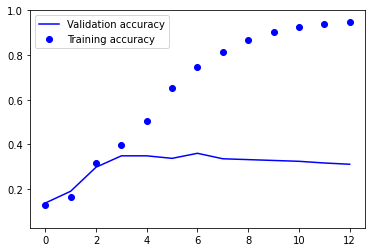

History: [3.112462043762207, 2.989506959915161, 2.741380453109741, 2.6277828216552734, 2.54933762550354, 2.61069655418396, 2.622866630554199, 2.727015256881714, 2.782102346420288, 2.879192352294922, 2.9511547088623047, 3.087031602859497, 3.0995848178863525]
Min loss: 2.54933762550354


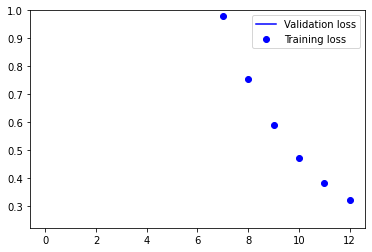

In [24]:
plot_history(lstm_history)
plot_history_loss(lstm_history)

## Discussion

More hyperparameter tuning is needed for Recurrent Neural Netwroks. So far, the performance of LSTM with the current setup is quite bad especially compared to the BoW models. LSTM is good at learning long-term and ordered structure of the documents, but that approach seems not to be helpful in classifying the documents. The superior performance of BoW suggests that word occurrence in the documents is more relevant in the classifying task.